# Cars DataSet

## Let's figure out what is the best car for your midlife crisses, and learn a thing or two about cars.

### Step 1: Importing Libraries
#### What I like to do when importing libraries, is to import these 5 libraries regardless if I will use them or not. It's the equivalent of having stationery pouch full of pens, I will probably rarely use but I like to have them handy and to prepare my mindset heading into the script


In [1]:
# Load neccessary libraries
import pandas as pd # For DataFrame and handling
import numpy as np # Array and numerical processing
import matplotlib.pyplot as plt # Low level plotting
import plotly.express as px # High-level wrapper for Plotly
import seaborn as sns # High level Plotting

#### Reference
#### https://www.ylz.ncx.mybluehost.me/scavetta.academy/misk_DSI/5_learn_python/_book/getting-started-plant-growth-case-study.html
#### https://plotly.com/python/plotly-express/

### Step 2: Loading the data
#### My preference is to load the data directly from github, instead of downloading it locally and then loading it. Thankfully, in this case we didn't need to do any fancy loading. Just a simple "pd.read_csv" without any adjustements. The only caveat is that we loaded two seperate csv files

In [2]:
# Read the data
cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

### Step 3: Munging the data
#### As we mentioned in step 2, the only caveat in loading that data is that we had to read two different data sets.

In [3]:
# Check if the two data frames have the same size
print(cars1.shape)
print(cars2.shape)

(198, 14)
(200, 9)


#### It seems that either cars1 have additional coulmns or cars2 have missing columns

In [3]:
# Lets get a look at cars1 
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [5]:
# Lets get a look at cars2
cars2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


#### Fortunately, it was that cars1 have extra NaN columns and not the other way around. Other than that the data for now looks good

#### Lets get rid of the cars1 extra columns, since they have no use for us that was an easy decision.
#### It just makes us wonder if there was anything in thos columns, but that's another story for another day

In [4]:
# Remove "Unnamed" columns
cars1 = cars1.loc[:, "mpg":"car"]
 

#### This is the point where we deciced to merge the two data frames into one data frame.
#### An alternative is to look for other "faults" in the seperate data frames, then combine.
#### We thought, it would better to do it now rather than later to look at the big picture early on in the process

In [6]:
# Append both data frames into one, and reset the index
cars = cars1.append(cars2).reset_index()
# Get another look at the new data frame
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    int64  
 4   horsepower    398 non-null    object 
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model         398 non-null    int64  
 8   origin        398 non-null    int64  
 9   car           398 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 31.2+ KB


#### Fortunately, overall the data looks good. Except the "horsepower" columns seems to be an object, which could unnecessarily complicate our exploration process.
#### Let's convert it from an "object" to a "float" or " integer"

In [7]:
# Convert horsepower from object to a numerical value 
pd.to_numeric(cars["horsepower"])

ValueError: Unable to parse string "?" at position 32

#### It seems there is a value error, because there is "?" value in index 32
#### In hindsight, it was good that we deciced to convert "horsepower" other wise we would have faced this problem much latter. 

In [26]:
# Let's get a look at index 32
cars.loc[32]

index                   32
mpg                   25.0
cylinders                4
displacement            98
horsepower               ?
weight                2046
acceleration          19.0
model                   71
origin                   1
car             ford pinto
Name: 32, dtype: object

#### There is no "horsepower" value, and there is instead a "?" mark. Fortunately, for now that seems to be a problem in "horsepower" columns
#### Let's check if this is problem is only in row index 32, or not 

In [27]:
# Search for other rows indices with the "?" value
cars[cars.horsepower == "?"]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
32,32,25.0,4,98,?,2046,19.0,71,1,ford pinto
126,126,21.0,6,200,?,2875,17.0,74,1,ford maverick
330,132,40.9,4,85,?,1835,17.3,80,2,renault lecar deluxe
336,138,23.6,4,140,?,2905,14.3,80,1,ford mustang cobra
354,156,34.5,4,100,?,2320,15.8,81,2,renault 18i
374,176,23.0,4,151,?,3035,20.5,82,1,amc concord dl


#### There is 6 rows missing (2 in cars1, 4 in cars2). In grand scheme of things, 6 rows out of 398 rows is not a large portion. 
#### Since that accounts for about %2 of the data we have, we can make the decision of dropping those rows without thinking too much about the alternatives

In [7]:
# Drop the rows with missing "horsepower" values, and reset the index
cars = cars.drop(cars.index[cars.horsepower == "?"]).reset_index(drop=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    int64  
 4   horsepower    392 non-null    object 
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model         392 non-null    int64  
 8   origin        392 non-null    int64  
 9   car           392 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 30.8+ KB


#### Now let's get back on track, convert the "horsepower" column from an object to a numerical type

In [8]:
# Convert "horsepower" using pandas "to_numeric" function
cars["horsepower"] = pd.to_numeric(cars["horsepower"])

#### Let's take another final look before moving on to the next step. We check if there is any null values in any of our columns.

In [10]:
# Check to see if there is null data.
cars.isnull().sum()

index           0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

#### Now, we can move on to exploring our data resting assured we munged the data.

### Step 4: Exploring the data
#### In this step, we search for interesting connections and information that helps us with answering our question. 

#### Lets get another look at our data again, and what each columns means

In [73]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    int64  
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model         392 non-null    int64  
 8   origin        392 non-null    int64  
 9   car           392 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 30.8+ KB


#### Let's understand what those column labels mean 

In [74]:
# mpg: distance measured in miles, that a car can travel per gallon of fuel.
# cylinders: numbers of cylinders that a car engine contain.
# displacement: volume swept by all the pistons inside the cylinders of an internal combustion engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC). In other word, it's how much big the cylinder volume is.
# horsepower: a unit of measurement of power, the more horsepower (hp) a car has the faster it is.
# weight: in pounds.
# acceleration: time in seconds (s) a car takes to get to 60 miles per hours (mph), also known as 0-60 time. 
# model: year that car was manufactured

#### The only label that we can't tell what it means immediately, is the origin label. Let's see what it means

In [81]:
# Find unique values in origin columns
cars.origin.unique()

array([1, 3, 2])

In [80]:
# We want to find, if there is a pattern with the cars that are of origin 1
cars[cars.origin == 1]
#cars[cars.origin == 2]
#cars[cars.origin == 3]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
386,194,27.0,4,151,90,2950,17.3,82,1,chevrolet camaro
387,195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
389,197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
390,198,28.0,4,120,79,2625,18.6,82,1,ford ranger


#### After exploring each origin, we can see origin indicates where the car origins is from. Where:
#### Origin 1 ==> American cars
#### Origin 2 ==> European cars
#### Origin 3 ==> Japanese cars

In [82]:
# How many American, European, and Japanese cars is in the data set?
cars.origin.value_counts()
# It's seems most of the cars are American

1    245
3     79
2     68
Name: origin, dtype: int64

#### The majoritiy of cars are of American origin, let's see if there is any interesting trends because of the car origin

In [11]:
# Is there any interesting trend because where a car is originall from?
# We first look at horsepower
# What country makes the most powerful cars?
print(cars.groupby(['origin'])['horsepower'].mean())
print(cars.groupby(['origin'])['weight'].mean())
# Lets plot it, and factor in acceleration

origin
1    119.048980
2     80.558824
3     79.835443
Name: horsepower, dtype: float64
origin
1    3372.489796
2    2433.470588
3    2221.227848
Name: weight, dtype: float64


#### Hmm interesting, it seems that american cars on average are much more powerful and heavier than other origin cars.

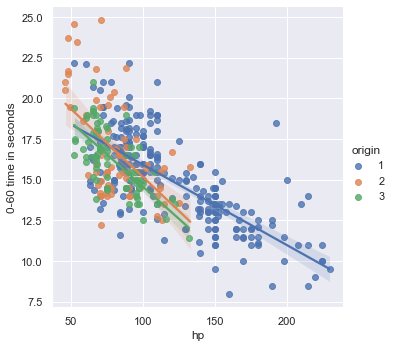

In [106]:
# Lets plot it, and factor in acceleration
sns.set_theme()
# Plot acceleration as a function of horsepower
g = sns.lmplot(
    data=cars,
    x="horsepower", y="acceleration", hue="origin",
    height=5
)

# Use more informative axis labels
g.set_axis_labels( "hp","0-60 time in seconds")

#### Ignoring the linera regression lines. It's clear that american cars are more powerful than there counter parts. American Muscle!!!
#### Additionally, in general we can see that the more horsepower a car has the faster it is. Which is not shocking
#### Let's to do the same but for weight


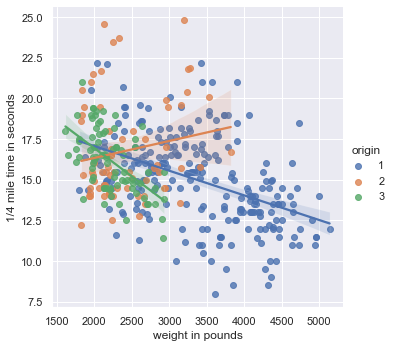

In [97]:
# Lets plot it, and factor in acceleration
sns.set_theme()
# Plot acceleration as a function of weight
g = sns.lmplot(
    data=cars,
    x="weight", y="acceleration", hue="origin",
    height=5
)

# Use more informative axis labels
g.set_axis_labels( "weight in pounds","0-60 time in seconds")

#### It's seems there is less of a corellation than the previuos plot, but it's safte to say that heavier cars seems to have slower times.

#### Let's find the fastest cars, with the heighest mpg. For those of us who are cheapskates but also like to have fun.

In [108]:
cars[(cars.mpg >= 15) & (cars.acceleration <= 10)]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
5,5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
9,9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl
10,10,15.0,8,383,170,3563,10.0,70,1,dodge challenger se
12,12,15.0,8,400,150,3761,9.5,70,1,chevrolet monte carlo
115,116,16.0,8,400,230,4278,9.5,73,1,pontiac grand prix


#### These cars are your top 5 choices, if you want a 10 seconds or less 0-60 time and don't want to speend too much on gas.

#### What if you have an RV, and want the fastest car with the lowest weight (and you don't care about climate change)? 

In [125]:
cars[ (cars.acceleration <= 11) & (cars.weight <= 3500)]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
2,2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
4,4,17.0,8,302,140,3449,10.5,70,1,ford torino
13,13,14.0,8,455,225,3086,10.0,70,1,buick estate wagon (sw)
120,121,15.0,8,318,150,3399,11.0,73,1,dodge dart custom


#### These cars are your top 4 choices, if you want a 11 seconds or less 0-60 time that is light so you can easily pull in your RV.

#### Is there a relationship between the number of cylinders, and the gas consumption of a car?

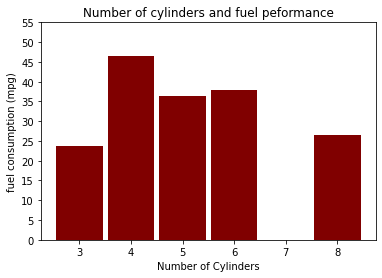

In [53]:
plt.bar(cars.cylinders, cars.mpg, color ='maroon',
        width = 0.9)
 
plt.xlabel("Number of Cylinders")
plt.ylabel("fuel consumption (mpg)")
plt.yticks(np.arange(0, 60, 5))
plt.title("Number of cylinders and fuel peformance")
plt.show()

#### Very Interesting!!! It seems that the 3 cylinder performed worse than the 8 cylinder engine, but and the 4 cylinder seems to be the best by far.

# Findings:
#### American cars on average are more powerful and heavier than European and Japanese cars.
#### Cars with higher horsepower are tend to be faster
#### The fastest cars with a good mpg are: ford galaxie 500, amc ambassador dpl, dodge challenger se،chevrolet monte carlo،pontiac grand prix
#### The fastest cars with lightest weight are: plymouth satellite, ford torino, buick estate wagon (sw), dodge dart custom
#### The best fuel peforming engine is the 4 cylinder, and the worst was the 3 cylinder one.

